# Transformação de variáveis com Python

Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

## 1. Carregamento dos Dados

In [2]:
dados = pd.read_csv('adult.data.csv')

#### Visualizando o conjunto de dados

In [3]:
dados.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Separação entre variáveis preditoras e alvo

In [4]:
variaveis_preditoras = dados.iloc[:, 0:14]
alvo = dados.iloc[:, 14]

As variáveis preditoras contêm todas as colunas exceto a última, que é a variável alvo.

In [5]:
variaveis_preditoras

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [6]:
alvo

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

## 3. Transformação da variável alvo com LabelEncoder

Converte rótulos categóricos ('<=50K', '>50K') em valores numéricos (0, 1)

In [7]:
encoder = LabelEncoder()
alvo = encoder.fit_transform(alvo)

In [8]:
alvo

array([0, 0, 0, ..., 0, 0, 1])

### Exemplo didático: LabelEncoder em variável categórica nominal

Contagem de valores da coluna 'workclass'

In [9]:
variaveis_preditoras['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [10]:
workclass_codificado = encoder.fit_transform(variaveis_preditoras['workclass'])
print("Valores codificados pela ordem alfabética:")
print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))

Valores codificados pela ordem alfabética:
{' ?': 0, ' Federal-gov': 1, ' Local-gov': 2, ' Never-worked': 3, ' Private': 4, ' Self-emp-inc': 5, ' Self-emp-not-inc': 6, ' State-gov': 7, ' Without-pay': 8}


⚠️ Por que é inadequado?
O LabelEncoder transforma categorias nominais em valores numéricos inteiros, o que pode induzir o modelo a interpretar uma relação ordinal onde ela não existe.
 
 Ex: 'Private' (4) pode parecer maior ou mais importante que 'Federal-gov' (1).
 Para variáveis categóricas nominais não dicotômicas, o correto é usar One-Hot Encoding.

Utilizar o `LabelEncoder` para transformar a variáveis dicotômicas, convertendo rótulos categóricos em valores numéricos.

## 4. Codificação de variáveis categóricas com One-Hot Encoding

In [11]:
# Exibe a contagem de categorias únicas da coluna 'workclass'
print(variaveis_preditoras['workclass'].value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


### Utilizando as variáveis DUMMY

In [12]:
one_hot = pd.get_dummies(data=variaveis_preditoras, columns=['workclass'])

In [13]:
one_hot

,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,...,native-country,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,False,False,False,False,False,False,False,True,False
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,False,False,False,False,False,False,True,False,False
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,United-States,False,False,False,False,True,False,False,False,False
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,United-States,False,False,False,False,True,False,False,False,False
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,Cuba,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,United-States,False,False,False,False,True,False,False,False,False
32557,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,United-States,False,False,False,False,True,False,False,False,False
32558,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,United-States,False,False,False,False,True,False,False,False,False
32559,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,...,United-States,False,False,False,False,True,False,False,False,False


A codificação One-Hot cria colunas binárias para representar a presença ou ausência de categorias.

In [14]:
# Criando dummies para múltiplas colunas
one_hot_full = pd.get_dummies(data=variaveis_preditoras, columns=['workclass', 'education', 'marital-status', 
                                                                  'occupation', 'relationship', 'race', 
                                                                  'gender', 'native-country'])

In [15]:
one_hot_full

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,20,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Aplicando a codificação One-Hot para várias colunas categóricas ao mesmo tempo

## Escalonamento

## 1. Padronização dos Dados

Padronização é o processo de centralizar as variáveis em torno da média e escalá-las para ter desvio padrão 1.

In [16]:
variaveis_transformadas = variaveis_preditoras.select_dtypes(include='number')

scaler = StandardScaler()
padronizadas = scaler.fit_transform(variaveis_transformadas)
padronizadas = pd.DataFrame(padronizadas, columns=variaveis_transformadas.columns)
padronizadas

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [17]:
padronizadas.describe().round(2)  # resumo estatístico

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.58,-1.68,-3.53,-0.15,-0.22,-3.19
25%,-0.78,-0.68,-0.42,-0.15,-0.22,-0.04
50%,-0.12,-0.11,-0.03,-0.15,-0.22,-0.04
75%,0.69,0.45,0.75,-0.15,-0.22,0.37
max,3.77,12.27,2.30,13.39,10.59,4.74


## 2. Normalização Min-Max
A normalização Min-Max escala as variáveis para um intervalo específico, geralmente [0, 1], útil para algoritmos sensíveis à escala dos dados

In [18]:
minmax = MinMaxScaler()
normalizadas = minmax.fit_transform(variaveis_transformadas)
normalizadas_df = pd.DataFrame(normalizadas, columns=variaveis_transformadas.columns)
normalizadas_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [19]:
normalizadas_df.describe().round(2)  # resumo estatístico

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,0.30,0.12,0.61,0.01,0.02,0.40
std,0.19,0.07,0.17,0.07,0.09,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.15,0.07,0.53,0.00,0.00,0.40
50%,0.27,0.11,0.60,0.00,0.00,0.40
75%,0.42,0.15,0.73,0.00,0.00,0.45
max,1.00,1.00,1.00,1.00,1.00,1.00


C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


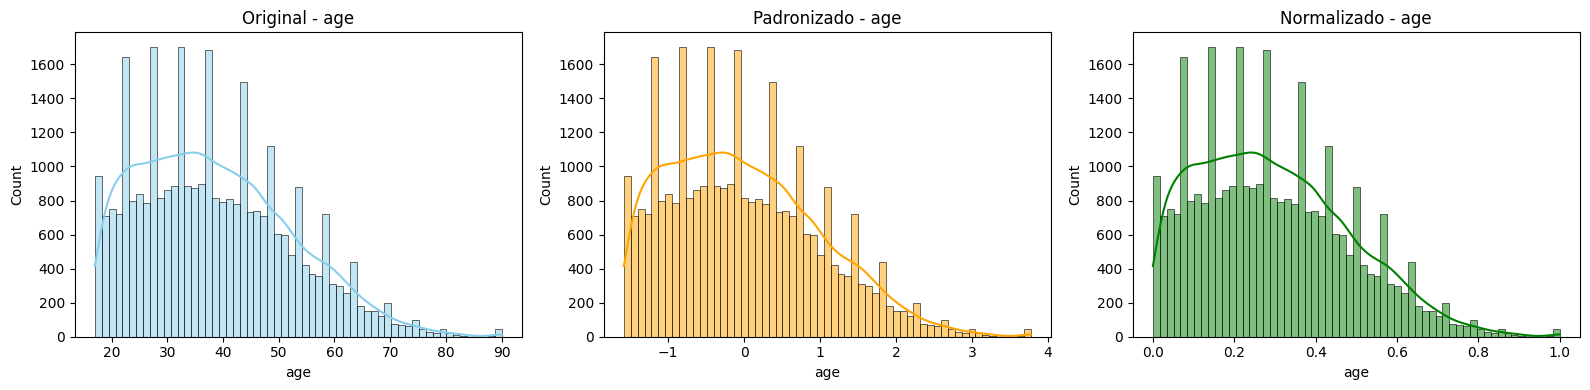

C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


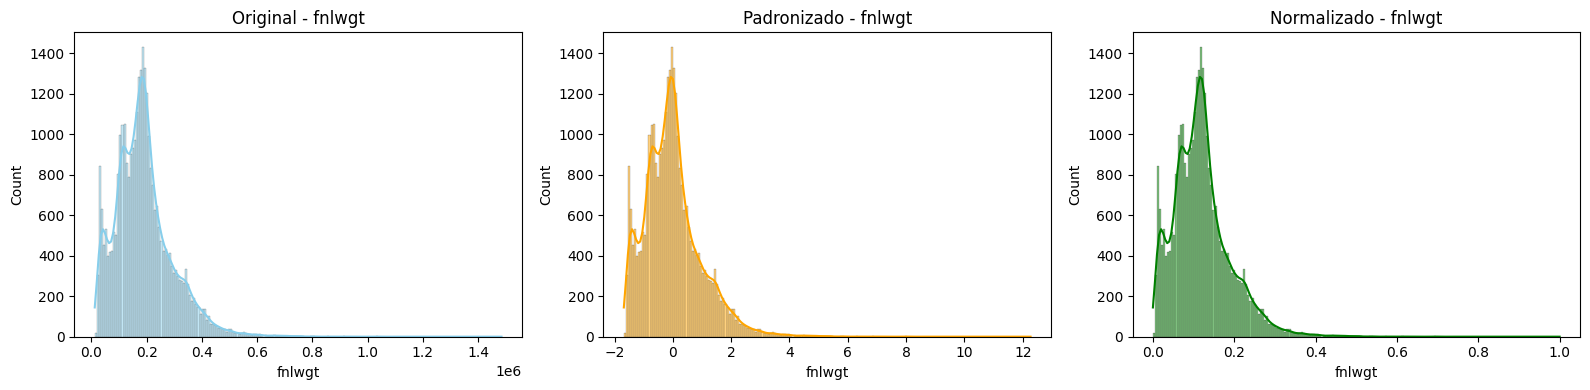

C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


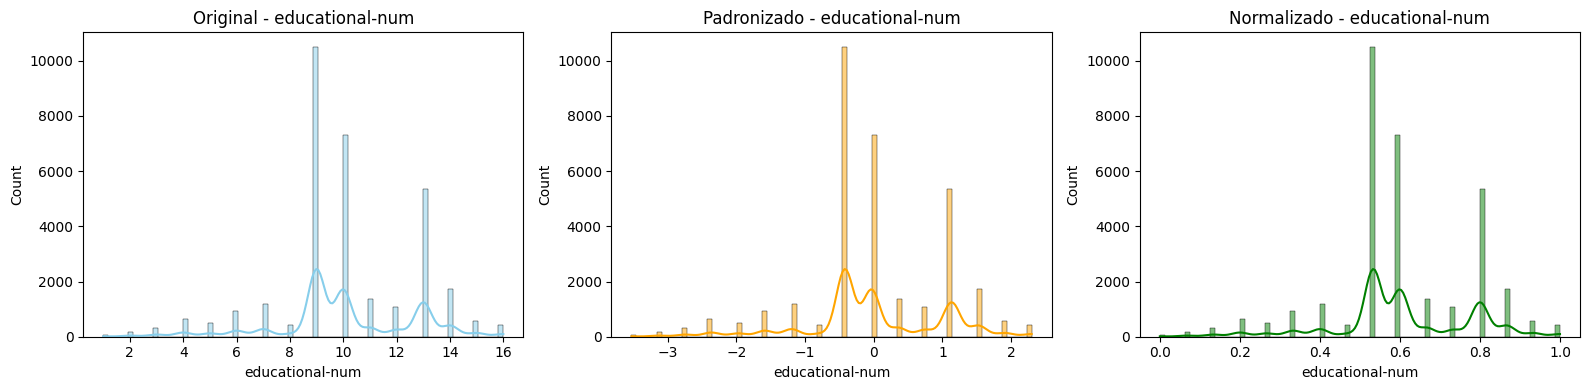

C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


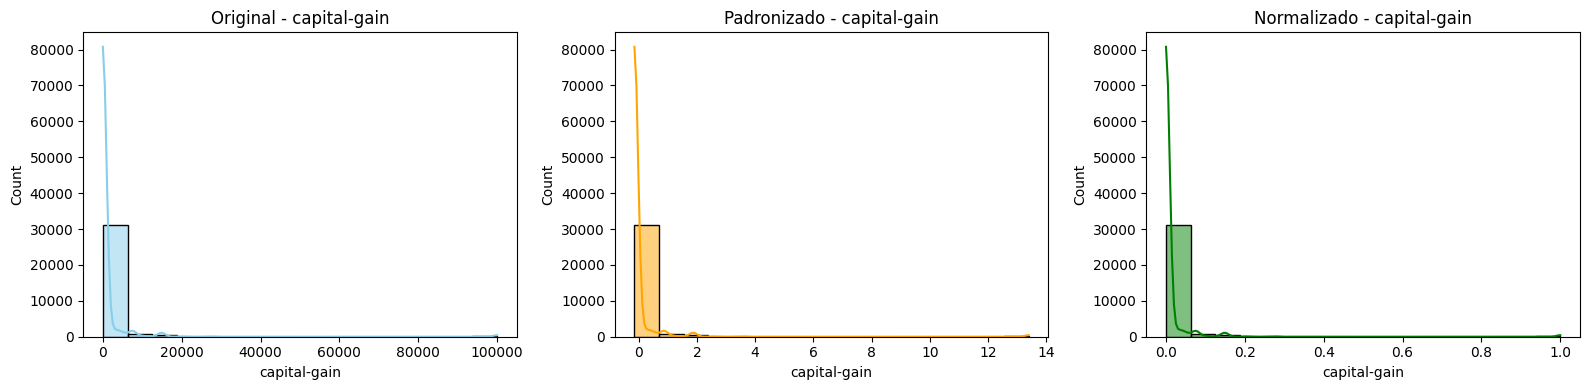

C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


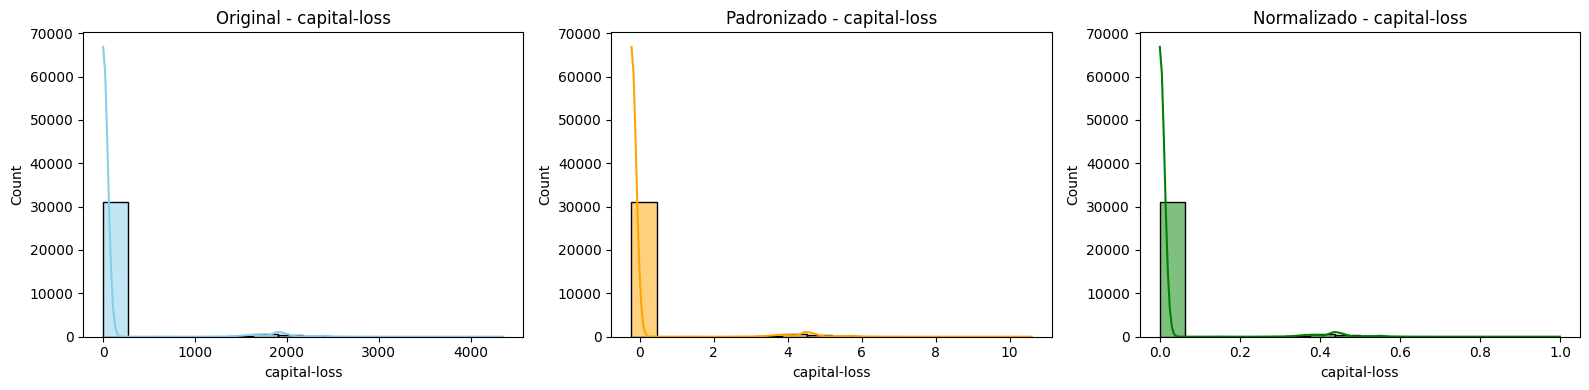

C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


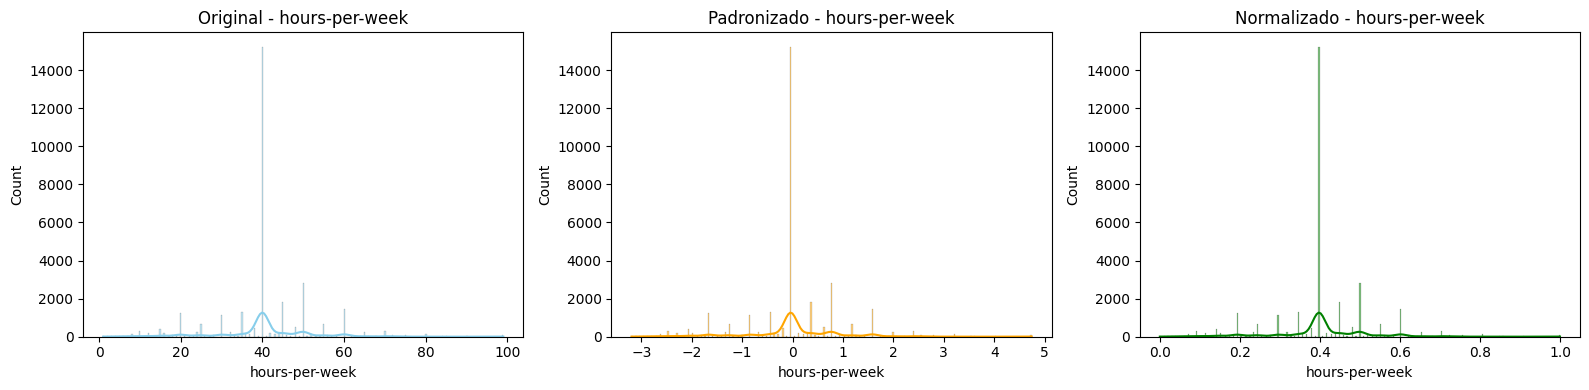

In [20]:
variaveis_numericas = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for var in variaveis_numericas:
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    sns.histplot(data=variaveis_transformadas, x=var, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Original - {var}")
    sns.histplot(data=padronizadas, x=var, kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f"Padronizado - {var}")
    sns.histplot(data=normalizadas_df, x=var, kde=True, ax=axes[2], color='green')
    axes[2].set_title(f"Normalizado - {var}")
    plt.tight_layout()
    plt.show()

Com essas etapas, cobrimos desde a transformação básica de variáveis categóricas até a padronização e normalização, preparando os dados para modelos de machine learning.